,time,OC (ugC/LCm^3),EC (ugC/LCm^3)
0,2013-06-04 01:01:00,2.873,0.136
1,2013-06-04 02:53:00,2.756,0.122
2,2013-06-04 04:53:00,2.842,0.128
3,2013-06-04 06:53:00,2.908,0.127
4,2013-06-04 08:53:00,2.327,0.097
...,...,...,...
2116,2013-11-27 06:53:00,0.870,0.066
2117,2013-11-27 08:53:00,1.092,0.079
2118,2013-11-27 10:53:00,1.034,0.087
2119,2013-11-27 12:53:00,1.003,0.117


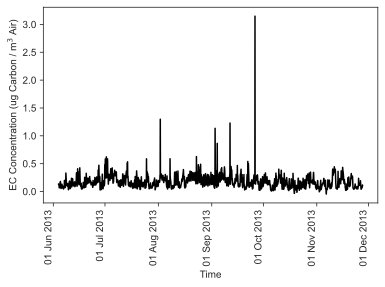

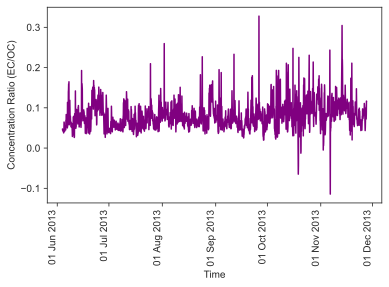

'EC Mean+-Std'

0.1748924321751548

0.12345297869011768

'OC Mean+-Std'

2.2677420276059017

1.4009903018220737

In [3]:
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'
# plt.xlabel(r"B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script in Plots ONLY


# DOE Manuscript BC Conc
# Load File
df = pd.read_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\SGP Filter correction Project\BC Data\request.100592.20211124.130501\arm-iop\2013\sgp\scocec\cary-ocec\OCEC_SGP_2013.csv", header=0)
# display(df)
# df = df.infer_objects()
df.replace("nd", np.nan, inplace=True)
df.dropna(inplace=True)

# df["OC (ugC/LCm^3)"].astype(float)
# df["EC (ugC/LCm^3)"].astype(float)

# display(df.dtypes)

#2.7 ############## EC&OC data Timeseries ####################

import datetime
df["time"] = pd.to_datetime(df["Sampling Mid-time of Collection UTC"], infer_datetime_format=True)

df = df[["time", "OC (ugC/LCm^3)", "EC (ugC/LCm^3)"]]
display(df)


# df[df<=0] = np.nan # For removing negative abs values
df.dropna(inplace=True)

df["OC (ugC/LCm^3)"]=pd.to_numeric(df["OC (ugC/LCm^3)"])
df["EC (ugC/LCm^3)"]=pd.to_numeric(df["EC (ugC/LCm^3)"])

df["OC"]=df["OC (ugC/LCm^3)"]
df["EC"]=df["EC (ugC/LCm^3)"]
df["EC/OC"] = df["EC"]/df["OC"]

# Plot1: EC Timeseries
df.plot(x="time", y="EC", legend=None, color="black")
plt.xticks(rotation=90)
plt.ylabel("EC Concentration (ug Carbon / m$^3$ Air)")
plt.xlabel("Time")

########### SNIPPET THAT CHANGES THE XLABEL TIME FORMAT IN GLOBAL FORMAT ###########
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_formatter(myFmt)
####################################################################################

plt.savefig('BC_ECTimeseries.png', bbox_inches='tight', dpi=600)
plt.show()

# Plot2: Ratio Timeseries
df.plot(x="time", y="EC/OC", legend=None, color = "purple")
plt.xticks(rotation=90)
plt.ylabel("Concentration Ratio (EC/OC)")
plt.xlabel("Time")

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.savefig('BC_ECOCRatio_Timeseries.png', bbox_inches='tight', dpi=600)
plt.show()


display("EC Mean+-Std", df["EC"].mean(), df["EC"].std())
display("OC Mean+-Std", df["OC"].mean(), df["OC"].std())